### Import libraries

In [31]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Functions

In [32]:
def display_image(img):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

### Extract images

In [33]:
image1 = cv.imread("./input/dice_3d_model.png", 0)
image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB)
image2 = cv.imread("./input/dice_3d_impresion.png", 0)
image2 = cv.cvtColor(image2, cv.COLOR_BGR2RGB)

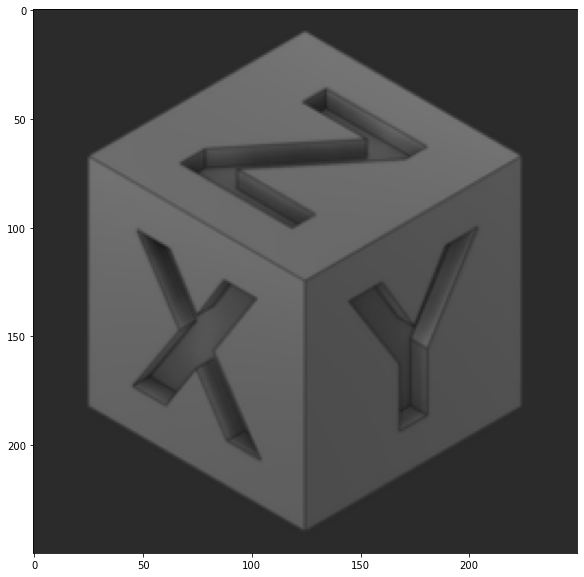

In [34]:
display_image(image1)

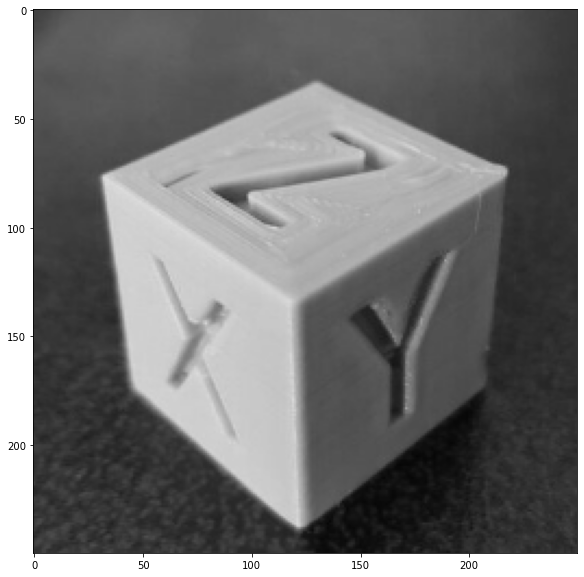

In [35]:
display_image(image2)

### Brute force detection with ORB Descriptors

In [36]:
# Initiate ORB detector
orb = cv.ORB_create()

# Find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(image1, None)
kp2, des2 = orb.detectAndCompute(image2, None)
print("Keypoints 1st image", str(len(kp1)))
print("Keypoints 2st image", str(len(kp2)))

# Create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(des1, des2)

# Sort them in the order of their distance
matches = sorted(matches, key=lambda x:x.distance)

# Draw matches
orb_matches = cv.drawMatches(image1, kp1, image2, kp2, matches, None, flags=2)

Keypoints 1st image 120
Keypoints 2st image 184


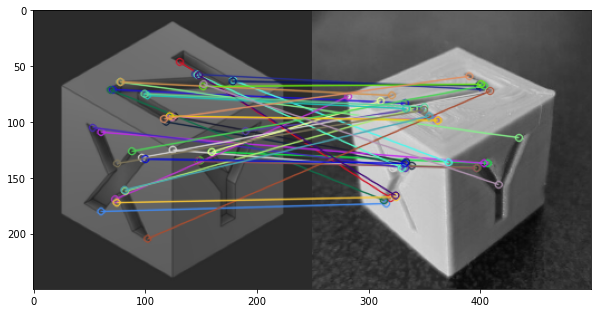

In [37]:
display_image(orb_matches)

### Brute force matching with SIFT descriptors and ratio test

In [38]:
# Create SIFT object
sift = cv.xfeatures2d.SIFT_create()

# Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(image1, None)
kp2, des2 = sift.detectAndCompute(image2, None)
print("Keypoints 1st image", str(len(kp1)))
print("Keypoints 2st image", str(len(kp2)))

# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good_matches = [[match1] for match1, match2 in matches if match1.distance < 0.75*match2.distance]
print("GOOD MATCHES", len(good_matches))

number_keypoints = len(kp1) if len(kp1) <= len(kp2) else len(kp2)
print("The images match in a", len(good_matches)/number_keypoints*100, "%\n")

# Draw matches
sift_matches = cv.drawMatchesKnn(image1, kp1, image2, kp2, good_matches, None, flags=2)

Keypoints 1st image 39
Keypoints 2st image 74
GOOD MATCHES 2
The images match in a 5.128205128205128 %



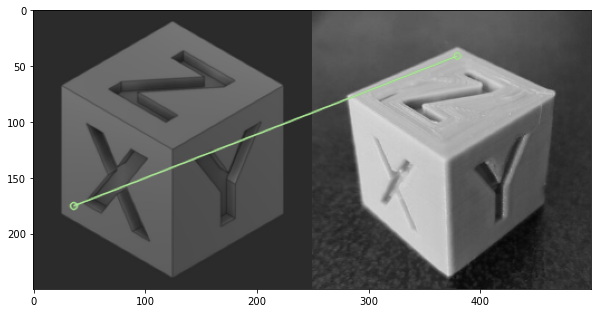

In [39]:
display_image(sift_matches)

### FLANN based matcher

In [40]:
# Create SIFT object
sift = cv.xfeatures2d.SIFT_create()

# Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(image1, None)
kp2, des2 = sift.detectAndCompute(image2, None)
print("Keypoints 1st image", str(len(kp1)))
print("Keypoints 2st image", str(len(kp2)))

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1, des2, k=2)

# Apply ratio test
good_matches = [[match1] for match1, match2 in matches if match1.distance < 0.7*match2.distance]
print("GOOD MATCHES", len(good_matches))

number_keypoints = len(kp1) if len(kp1) <= len(kp2) else len(kp2)
print("The images match in a", len(good_matches)/number_keypoints*100, "%\n")

# Draw matches
flann_matches = cv.drawMatchesKnn(image1, kp1, image2, kp2, good_matches, None, flags=0)

Keypoints 1st image 39
Keypoints 2st image 74
GOOD MATCHES 1
The images match in a 2.564102564102564 %



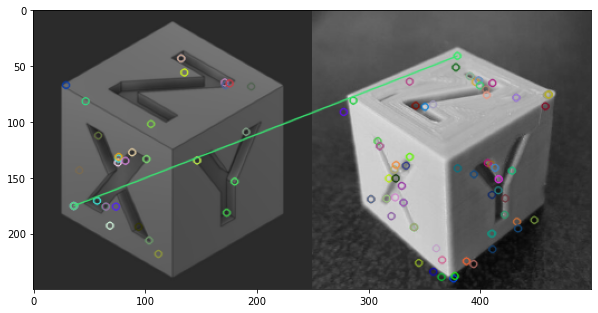

In [41]:
display_image(flann_matches)

In [42]:
# Create SIFT object
sift = cv.xfeatures2d.SIFT_create()

# Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(image1, None)
kp2, des2 = sift.detectAndCompute(image2, None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1, des2, k=2)

# Need to draw only good matches, so create a mask
matches_mask = [[0,0] for _ in range(len(matches))]

# Apply ratio test
for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matches_mask[i] = [1,0]

draw_params = dict(matchColor=(0, 255, 0),
                   singlePointColor=(255, 0, 0),
                   matchesMask=matches_mask,
                   flags=0)

# Draw matches
flann_matches = cv.drawMatchesKnn(image1, kp1, image2, kp2, matches, None, **draw_params)

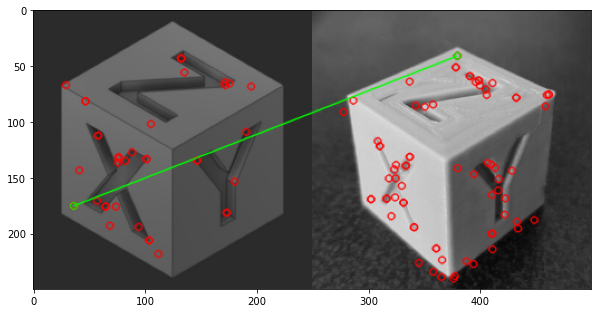

In [43]:
display_image(flann_matches)